<a href="https://colab.research.google.com/github/jesminmousumy/Python-Programming/blob/main/Exercise_2_Predicting_Product_Sales_in_Retail_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


<ipython-input-24-a5d290d45da5>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].mean(), inplace=True)
<ipython-input-24-a5d290d45da5>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

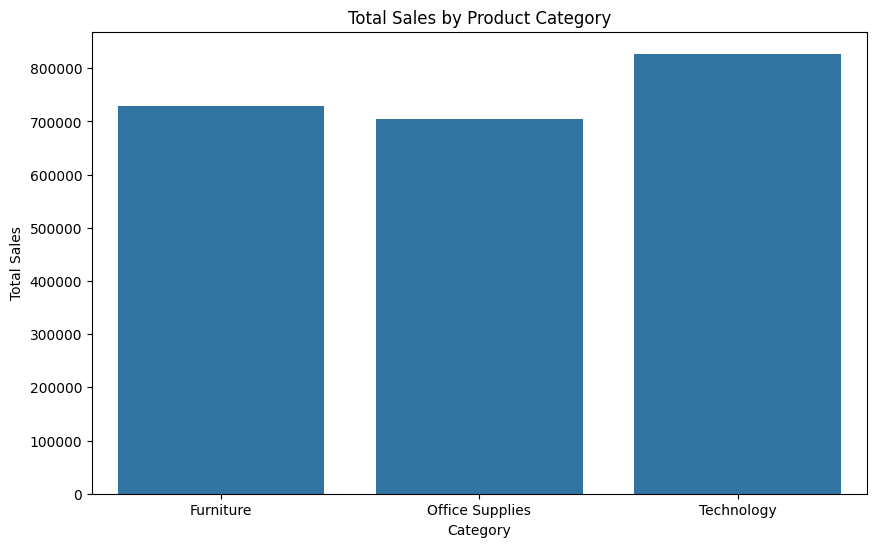

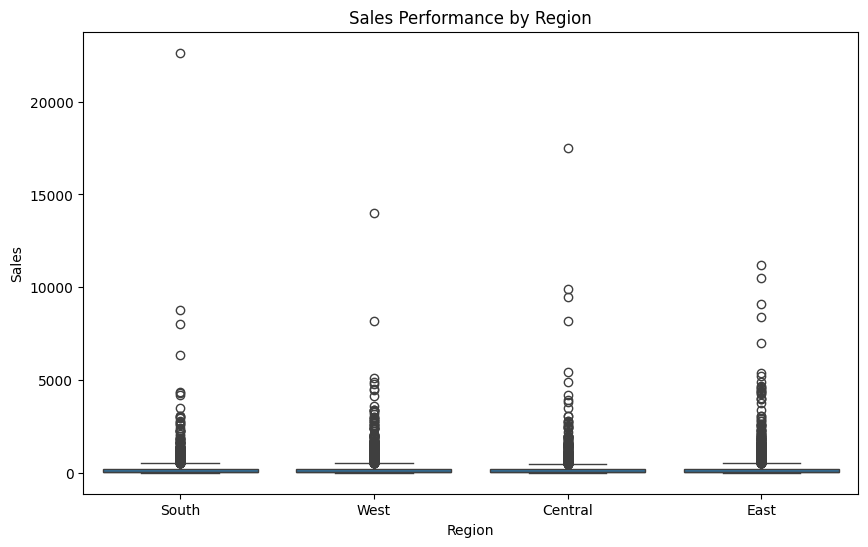

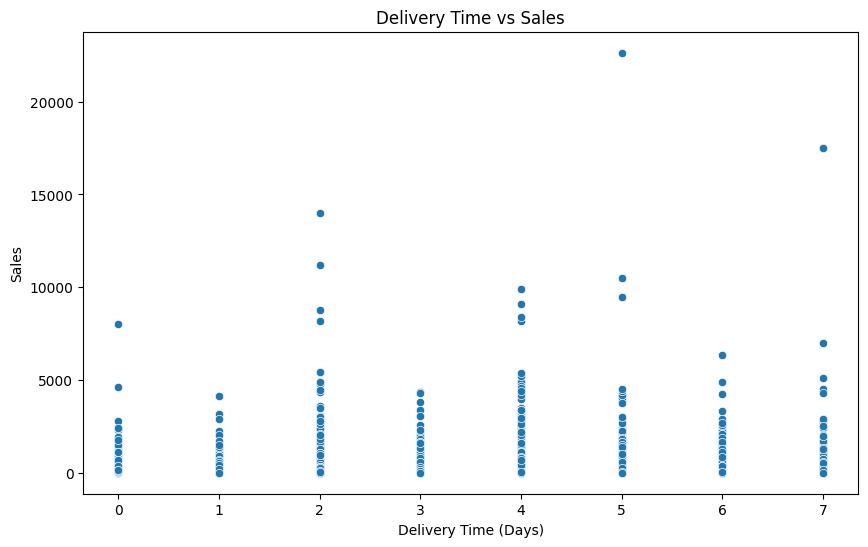

Mean Absolute Error: 249.9299686164762
Mean Squared Error: 636264.7259083176
R-squared: 0.048077626389526285


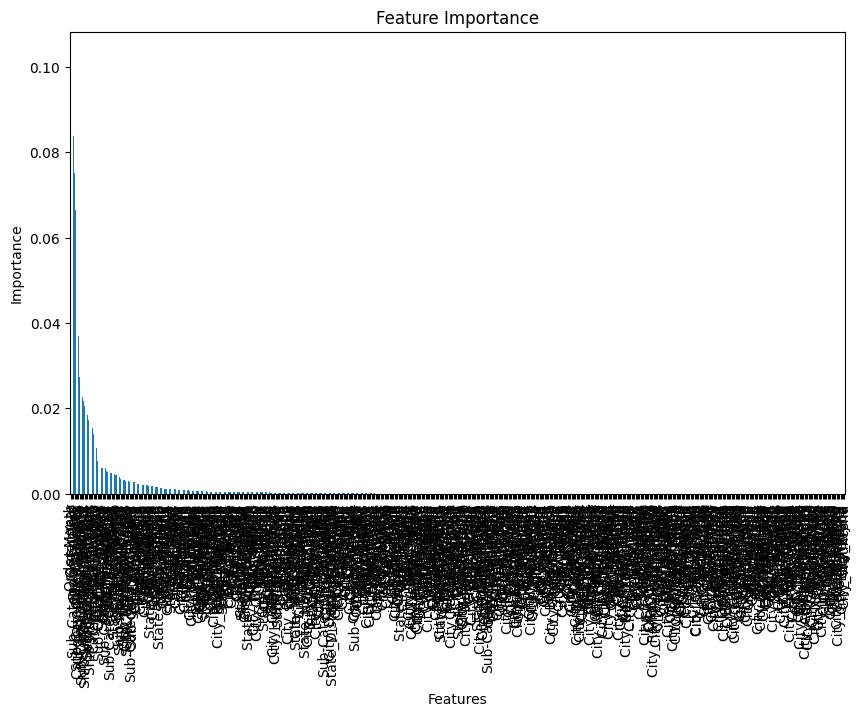

In [24]:

#Step 1 Data Collection
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#load Dataset
df = pd.read_csv('train.csv')
df.head()

#Data Preparation
#Handle Missing Values
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the mean
df['Sales'].fillna(df['Sales'].mean(), inplace=True)

# Fill missing categorical values with "Unknown"
df['Category'].fillna('Unknown', inplace=True)
df['Region'].fillna('Unknown', inplace=True)
df['Segment'].fillna('Unknown', inplace=True)
df['Ship Mode'].fillna('Unknown', inplace=True)

#Encode Categorical Features
# One-hot encoding for categorical features
# Create a copy of the DataFrame before one-hot encoding to preserve the original 'Category' column
df_encoded = pd.get_dummies(df, columns=['Category', 'Region', 'Segment', 'Ship Mode'], drop_first=True)


#Feature Engineering
# Extract Month and Year from Order Date
df_encoded['Order Date'] = pd.to_datetime(df_encoded['Order Date'], format='%d/%m/%Y') # Specify the correct format
df_encoded['Order Month'] = df_encoded['Order Date'].dt.month
df_encoded['Order Year'] = df_encoded['Order Date'].dt.year

# Calculate delivery time
df_encoded['Ship Date'] = pd.to_datetime(df_encoded['Ship Date'], format='%d/%m/%Y') # Apply the same format to Ship Date
df_encoded['Delivery Time'] = (df_encoded['Ship Date'] - df_encoded['Order Date']).dt.days

#Feature Scaling

# Normalize numerical features (e.g., Sales)
scaler = StandardScaler()
df_encoded['Sales Scaled'] = scaler.fit_transform(df_encoded[['Sales']])

#Step 3 Exploratory Data Analysis(EDA)
#Visualize sales by Categories

# Group by Category and calculate total sales
# Use the original DataFrame (df) to group by 'Category'
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#Analyze Regional Sales
# Compare sales performance across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

#Key Questions to Answer
#Which product categories contribute the most to total sales?
#Use the category_sales DataFrame to identify the top categories.
#Are there regional differences in sales performance?
#Analyze the box plot for regional sales.
#How does the delivery time affect sales volume?
#Use a scatter plot to visualize the relationship between delivery time and sales.

# Scatter plot for delivery time vs sales
# Scatter plot for delivery time vs sales
plt.figure(figsize=(10, 6))
# Use df_encoded instead of df, as 'Delivery Time' is in df_encoded
sns.scatterplot(x='Delivery Time', y='Sales', data=df_encoded)
plt.title('Delivery Time vs Sales')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Sales')
plt.show()

#Step 4 Modeling
#Split Data into Training and Testing Set

# Define features (X) and target (y)
# Use df_encoded instead of df for features
# Include 'City', 'State', and 'Country' in the columns to be one-hot encoded
X = pd.get_dummies(df_encoded, columns=['City', 'State', 'Country','Sub-Category'], drop_first=True)  # Include 'Country' here
#Drop all non-numerical columns
X = X.select_dtypes(exclude=['object','datetime']) #This line selects only numerical dtypes and drops the rest
#Drop the columns that aren't needed for prediction
X = X.drop(['Sales', 'Sales Scaled', 'Row ID','Postal Code'], axis=1,errors='ignore') #errors='ignore' will ignore if any of those columns are already dropped

y = df_encoded['Sales']  # or df_encoded['Sales Scaled'] if using the scaled sales

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train a Regression Model

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

#Evaluate a Model
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#Step 5: Insights
#Feature Importances
# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

